In [ ]:
# df = pd.get_dummies(df, columns=['maincategory', 'closuretype', 'multi_vehicle', 'road_type'])

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers
import ast  # Library for handling literal_eval
from geopy.distance import geodesic


df = pd.read_csv('merged.csv')

# Print the column names to verify
print(df.columns)

Index(['Main_Category', 'Longitude', 'Latitude', 'Day', 'duration',
       'Primary_Vehicle', 'Secondary_Vehicle', 'Is_Major_Incident', 'Advice_A',
       'Advice_B', 'Closure_Type', 'Direction', 'Main_Street',
       'Affected_Lanes', 'Actual_Number_of_Lanes ', 'Suburb', 'Traffic_Volume',
       'SA2_CODE21', 'SA3_CODE21', 'SA3_NAME21', 'SA4_CODE21', 'SA4_NAME21',
       'AREASQKM21', '1_Area', '2_ML', '3_TRL', '4_PRL', '5_SRL', '6_TrRL',
       '7_RRL', '8_LsRL', '9_URL', '10_ToRL', '11_EoR', '12_NoN', '13_NDEs',
       '14_NNC2L', '15_NNC3L', '16_NNC4L', '17_AND', '18_NE', '19_MCI',
       '20_CoI', '21 NBS', '22_CA', '23_EA', '24_HA', '25_IA', '26_OA',
       '27_PA', '28_PrA', '29_RA', '30_TA', '31_WbA', '32_EoLU', '33_TP',
       '34_PD0MV', '35_PD1MV', '36_PD2MV', '37_PD3MV', '38_PD≥4MV', '39_PUE',
       '40_AMI', '41_NPTtWbyPT', '42_NPTtWbyTx', '43_NPTtWbyCD',
       '44_NPTtWbyCP', '45_NPTtWbyO', '46_NPWfH', '47_PWCJH', '48_PBCJH',
       '49_ANP_FH', 'Emergency service(s)', 

## prepare classifier

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

names = [
    "RandomForestRegressor",
    "GradientBoostingRegressor"
]

classifiers = [
    RandomForestRegressor(n_jobs=10),
    GradientBoostingRegressor(random_state=0)
]

## prepare data - numerical duration

In [6]:
# Handle missing values, if any
df = df.dropna()

# Split data into features (X) and target (y)
X = df.drop(['Longitude', 'Latitude', 'duration'] , axis=1)
y = df['duration']  # Target variable, float

#y = (df['duration'] > 45).astype(int)  # Target variable (1 if duration is long, 0 if short)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## modelling

In [7]:
for name, clf in zip(names, classifiers):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # Cross-validated accuracy
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error').mean()

    # Display the results
    print(f'Model: {name}')
    print(f'mae:\n{mae}')
    print(f'mse:\n{mse}')
    print(f'Cross-validated Accuracy: {cross_val_acc:.2f}')
    print('===============================================')

Model: LinearRegression
mae:
33.21326978339591
mse:
3228.6924167808424
Cross-validated Accuracy: -274685095388283.19
Model: SGDRegressor
mae:
28.972995748091268
mse:
2853.6119109150272
Cross-validated Accuracy: -244533480540338.91



KeyboardInterrupt



## RF feature selection

In [8]:
feature_names = [f"{i}" for i in X.columns]
feature_names

['Main_Category',
 'Day',
 'Primary_Vehicle',
 'Secondary_Vehicle',
 'Is_Major_Incident',
 'Advice_A',
 'Advice_B',
 'Closure_Type',
 'Direction',
 'Main_Street',
 'Affected_Lanes',
 'Actual_Number_of_Lanes ',
 'Suburb',
 'Traffic_Volume',
 'SA2_CODE21',
 'SA3_CODE21',
 'SA3_NAME21',
 'SA4_CODE21',
 'SA4_NAME21',
 'AREASQKM21',
 '1_Area',
 '2_ML',
 '3_TRL',
 '4_PRL',
 '5_SRL',
 '6_TrRL',
 '7_RRL',
 '8_LsRL',
 '9_URL',
 '10_ToRL',
 '11_EoR',
 '12_NoN',
 '13_NDEs',
 '14_NNC2L',
 '15_NNC3L',
 '16_NNC4L',
 '17_AND',
 '18_NE',
 '19_MCI',
 '20_CoI',
 '21 NBS',
 '22_CA',
 '23_EA',
 '24_HA',
 '25_IA',
 '26_OA',
 '27_PA',
 '28_PrA',
 '29_RA',
 '30_TA',
 '31_WbA',
 '32_EoLU',
 '33_TP',
 '34_PD0MV',
 '35_PD1MV',
 '36_PD2MV',
 '37_PD3MV',
 '38_PD≥4MV',
 '39_PUE',
 '40_AMI',
 '41_NPTtWbyPT',
 '42_NPTtWbyTx',
 '43_NPTtWbyCD',
 '44_NPTtWbyCP',
 '45_NPTtWbyO',
 '46_NPWfH',
 '47_PWCJH',
 '48_PBCJH',
 '49_ANP_FH',
 'Emergency service(s)',
 'Motorway Crew',
 'Tow Truck',
 'Transport for NSW',
 'RMS',
 'E

In [9]:
forest = RandomForestRegressor(random_state=0,n_jobs=10)
forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.076 seconds


In [10]:
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values()
#forest_importances

28_PrA             0.000137
31_WbA             0.000171
SA4_NAME21         0.000192
8_LsRL             0.000276
Motorway Crew      0.000307
                     ...   
Main_Street        0.034617
Hour               0.035327
Traffic_Volume     0.052790
distance_to_CBD    0.062104
36_PD2MV           0.407037
Length: 80, dtype: float64

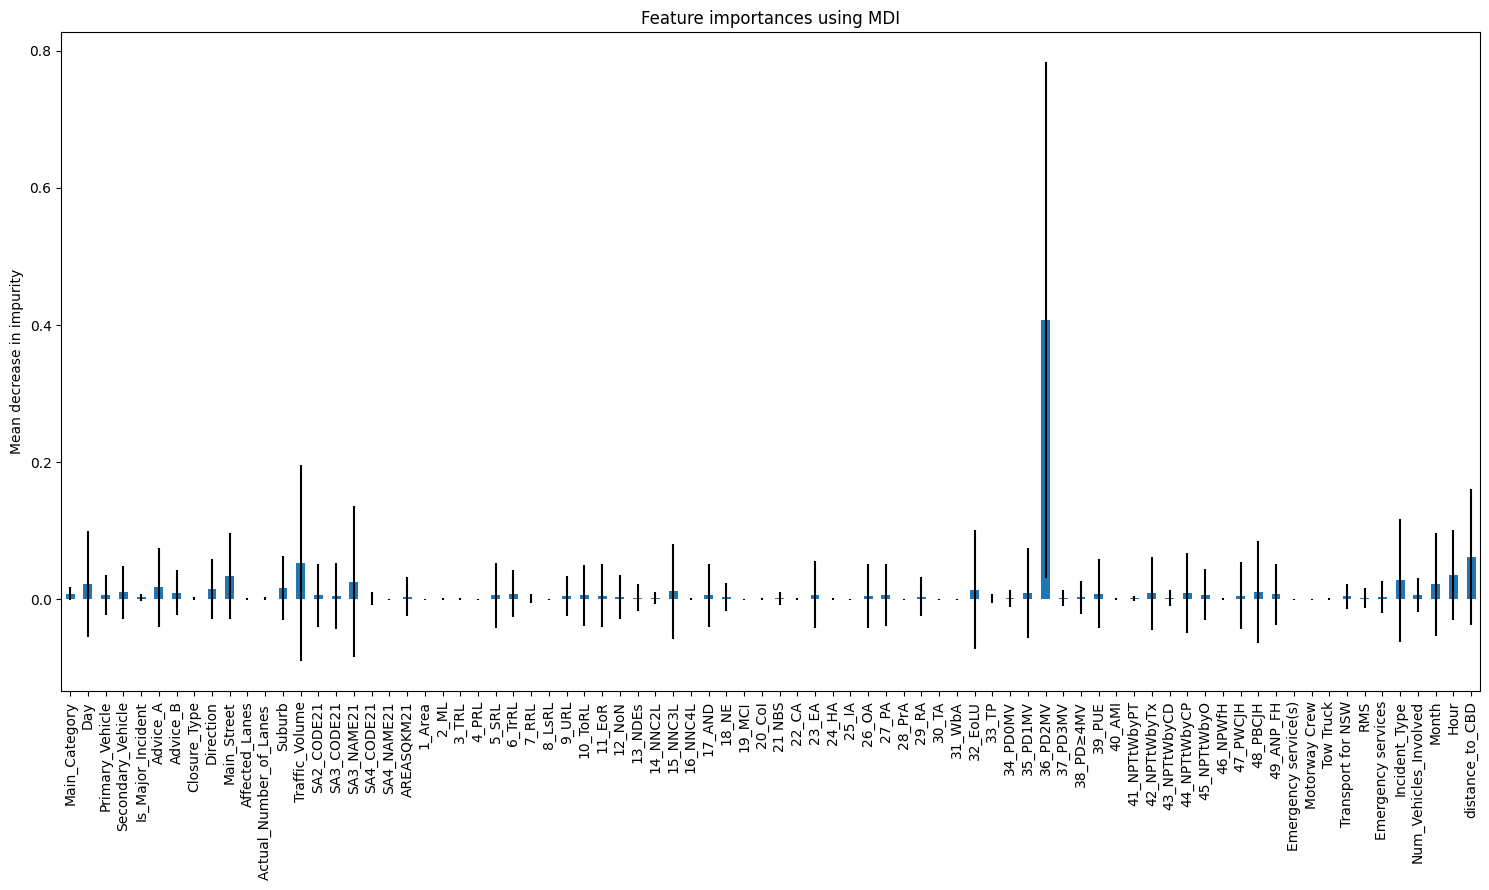

In [12]:
# plt.figure()
fig, ax = plt.subplots(figsize=(15,9))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

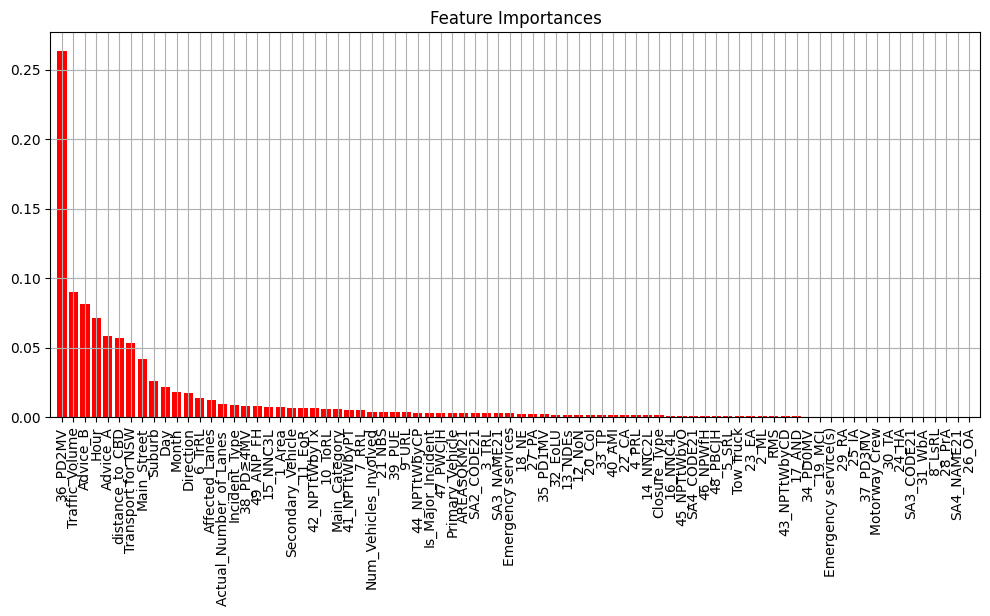

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and Y are defined and ready for use
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=10)

# Fit the model on the entire dataset
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Assuming we have a way to identify the feature names, for example:
feature_names = X.columns

# Sort the feature importances in descending order and plot
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(12, 5))
plt.title("Feature Importances")
plt.grid()
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10693
[LightGBM] [Info] Number of data points in the train set: 66238, number of used features: 80
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10693
[LightGBM] [Info] Number of data points in the train set: 66238, number of used features: 80
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10693
[LightGBM] [Info] Number of data points in the train set: 66238, number of used features: 80
[LightGBM] [Warning] Auto-choosing col-wi

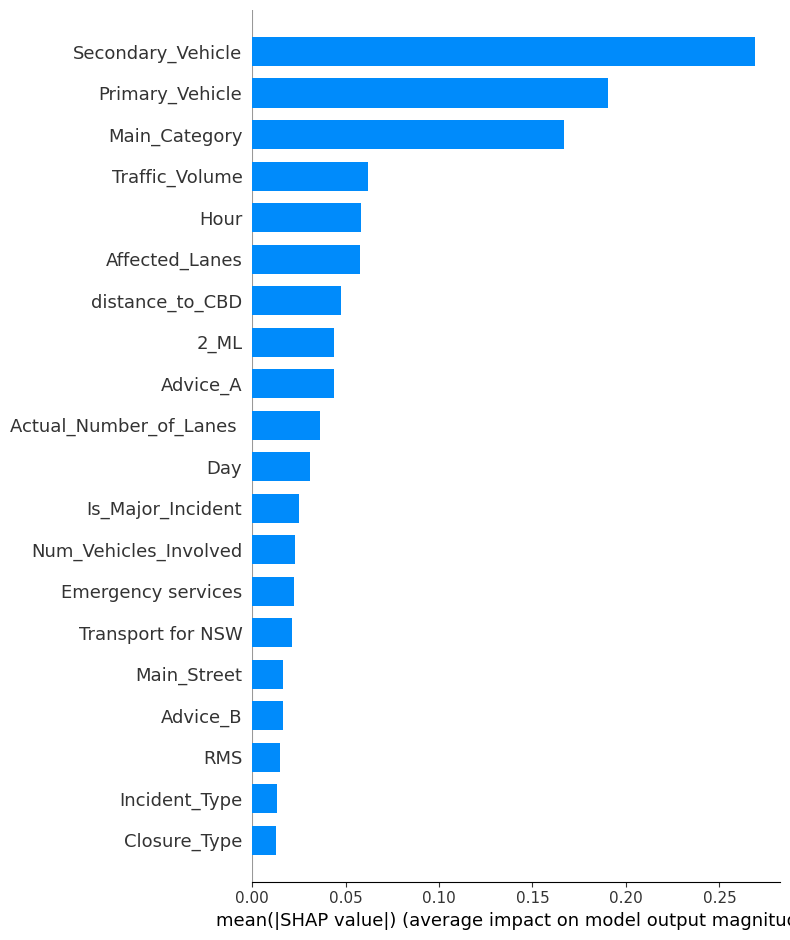

In [25]:
from sklearn.model_selection import KFold
import numpy as np
import lightgbm as lgb
import shap

# Assuming X and Y are your features and target variable arrays respectively

# Convert the dataset into LightGBM's Dataset format
train_data = lgb.Dataset(X, label=np.log1p(y), feature_name=list(X.columns), free_raw_data=False)

# Define the parameters for the LightGBM model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting': 'gbdt',
    'random_state': 42
}

# Set up K-Fold cross-validation (without stratification)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with 5 folds
cv_results = lgb.cv(
    params,
    train_data,
    num_boost_round=1000,
    folds=kf,
    metrics='rmse',
    early_stopping_rounds=50,
    seed=42
)

# Calculate the average RMSE from the cross-validation results
average_rmse = np.mean(cv_results['rmse-mean'])
print("Average RMSE:", average_rmse)

# Fit the model on the entire dataset for SHAP values
model = lgb.train(params, train_data, num_boost_round=len(cv_results['rmse-mean']))

# Initialize the SHAP Explainer with your LightGBM model
explainer = shap.TreeExplainer(model)

# Compute SHAP values for your features on a subset for efficiency
shap_values = explainer.shap_values(X)

# Plot the summary plot for feature importances
shap.summary_plot(shap_values, X, plot_type="bar")



import shap
import numpy as np

# Assuming shap_values and X are defined

# Calculate the sum of absolute SHAP values for each feature to determine their overall importance
feature_importance = np.sum(np.abs(shap_values), axis=0)

# Sort features by their importance
sorted_features_idx = np.argsort(-feature_importance)

# Select top N features for visualization (you can adjust N based on your dataset)
N = 20
top_features_idx = sorted_features_idx[:N]

# Create a mask to filter out all but the top N features
mask = np.zeros(shap_values.shape[1], dtype=bool)
mask[top_features_idx] = True

# Apply the mask to the SHAP values (select only top N features)
filtered_shap_values = shap_values[:, mask]

# Plotting
shap.summary_plot(filtered_shap_values, X.iloc[:, mask])



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


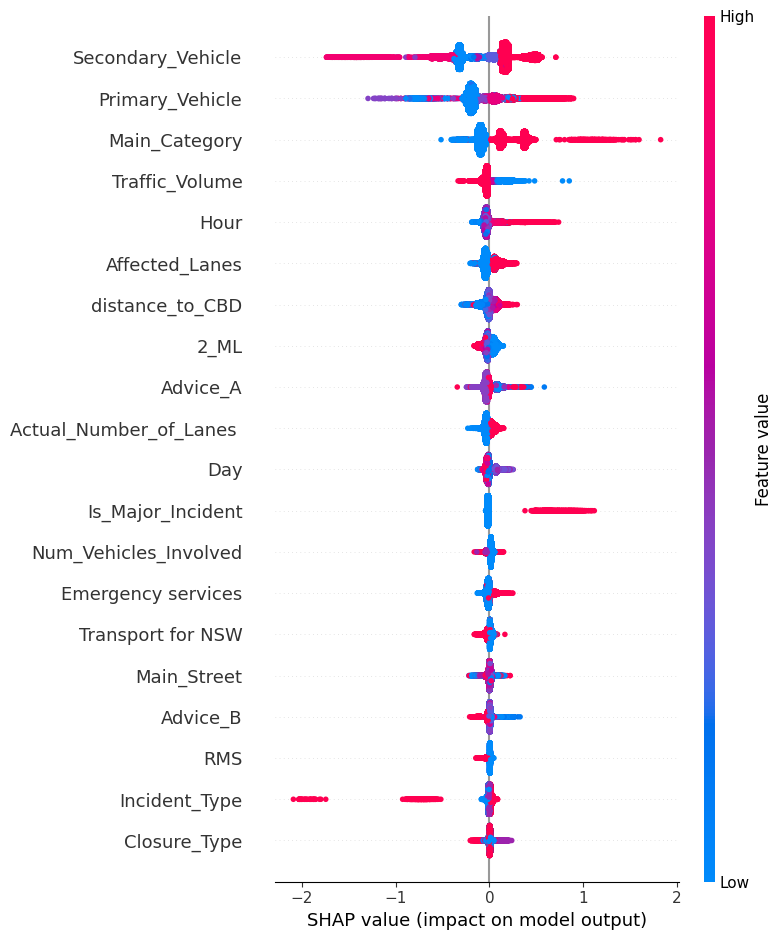

In [33]:
import shap
import numpy as np

# Assuming shap_values and X are defined

# Calculate the sum of absolute SHAP values for each feature to determine their overall importance
feature_importance = np.sum(np.abs(shap_values), axis=0)

# Sort features by their importance
sorted_features_idx = np.argsort(-feature_importance)

# Select top N features for visualization (you can adjust N based on your dataset)
N = 20
top_features_idx = sorted_features_idx[:N]

# Create a mask to filter out all but the top N features
mask = np.zeros(shap_values.shape[1], dtype=bool)
mask[top_features_idx] = True

# Apply the mask to the SHAP values (select only top N features)
filtered_shap_values = shap_values[:, mask]

# Plotting
shap.summary_plot(filtered_shap_values, X.iloc[:, mask])
